In [60]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
import data as dt
import strategies as st
import backtest as bt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mplcursors import cursor

In [107]:

week_day_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday'
}

def show_portfolio_performance(portfolio, ticker, week_day, summary):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    asset_value = portfolio['asset_value'].iloc[-1]
    cash = portfolio["cash"].iloc[-1]
    interest_total = portfolio["interest_total"].iloc[-1]
    total = portfolio["total"].iloc[-1]            
    original = portfolio["original"].iloc[-1]
    
    ax1.yaxis.get_major_formatter().set_scientific(False)
    ax1.set_ylabel('Portfolio value in $')    
    ax1.plot(portfolio.index, portfolio['asset_value'], label=f'Asset Value: ${asset_value:,.2f}')    
    ax1.plot(portfolio.index, portfolio['cash'], label=f'Cash:  ${cash:,.2f}')     
    ax1.plot(portfolio.index, portfolio["interest_total"], label=f'Interest: ${interest_total:,.2f}')    
    ax1.plot(portfolio.index, portfolio['total'], label=f'Total Value: ${total:,.2f}')        
    ax1.plot(portfolio.index, portfolio['original'], label=f'Initial Investment: ${original:,.2f}')
    
    ax2 = ax1.twinx()
    ax2.set_ylabel('Price in $')
    ax2.plot(data.index, data['Close'], label='Close Price', color='blue', alpha=0.3)
    
    ax1.legend(loc='upper left')
    ax2.legend(loc='lower right')
    plt.title(f'Portfolio Value - {week_day_map[week_day]} buys {ticker}')
    plt.grid()
    plt.show()    
    

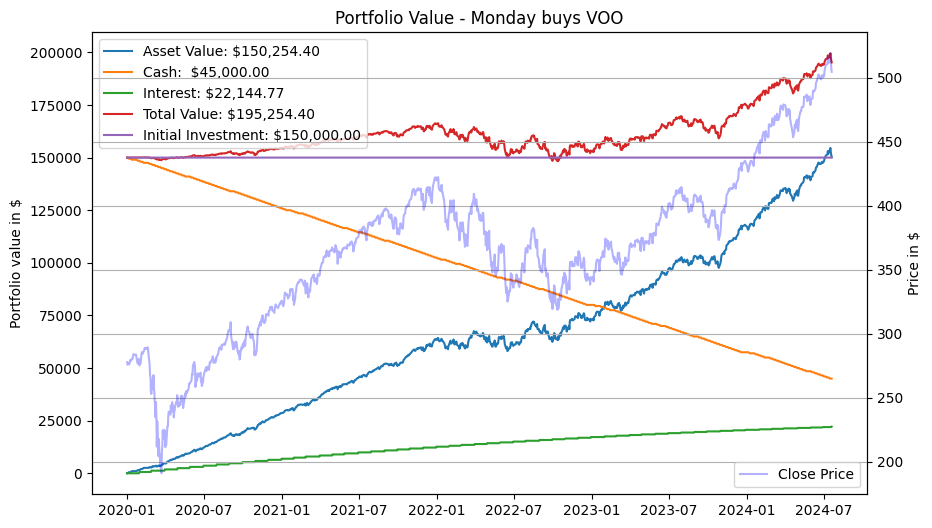

/var/folders/4_/x6br5jc55s97rq0bttk320qc0000gq/T/ipykernel_4457/107599483.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  summary = pd.concat([summary, new_row], ignore_index=True)


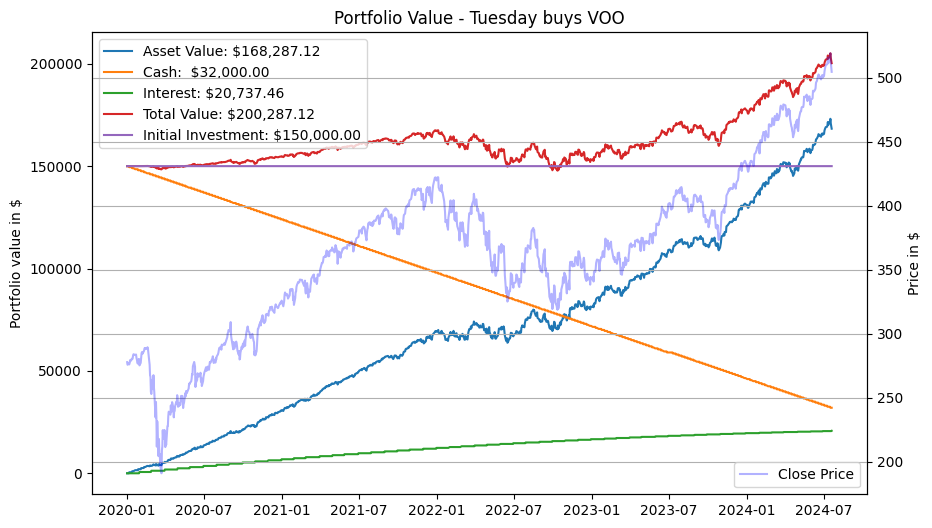

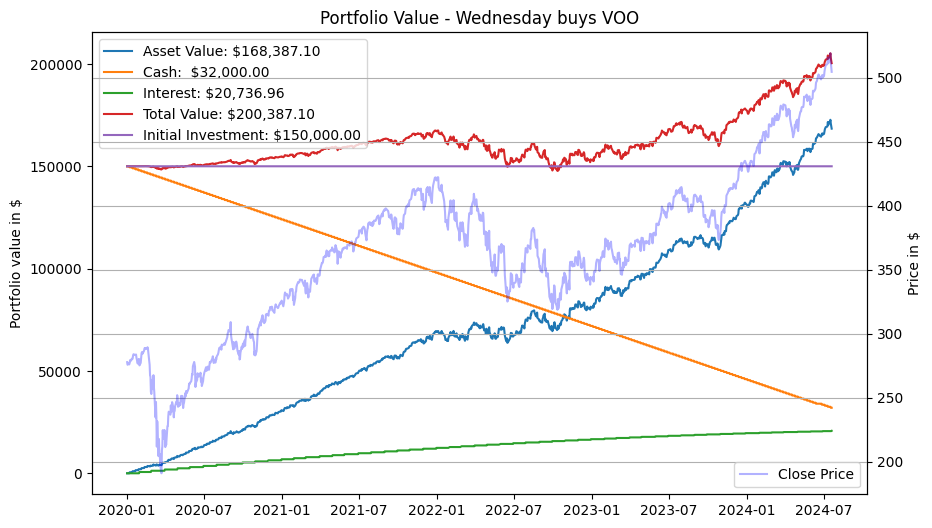

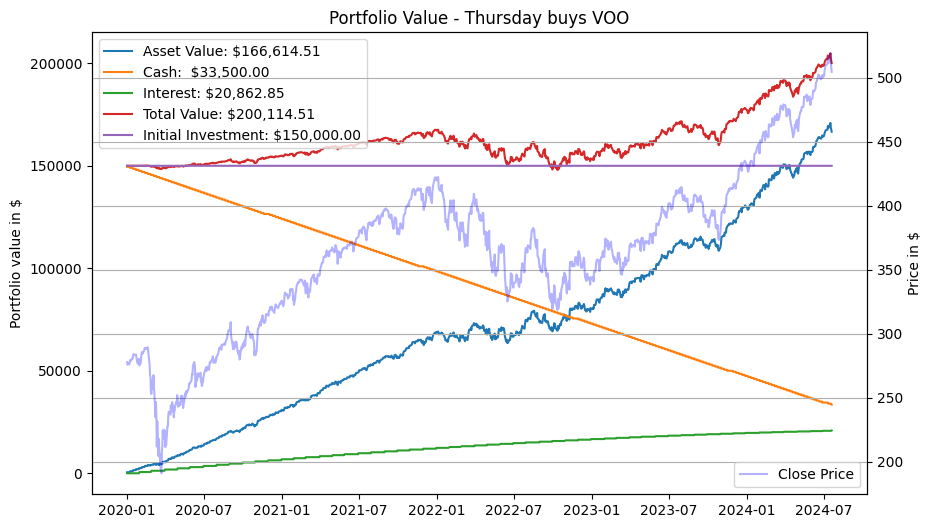

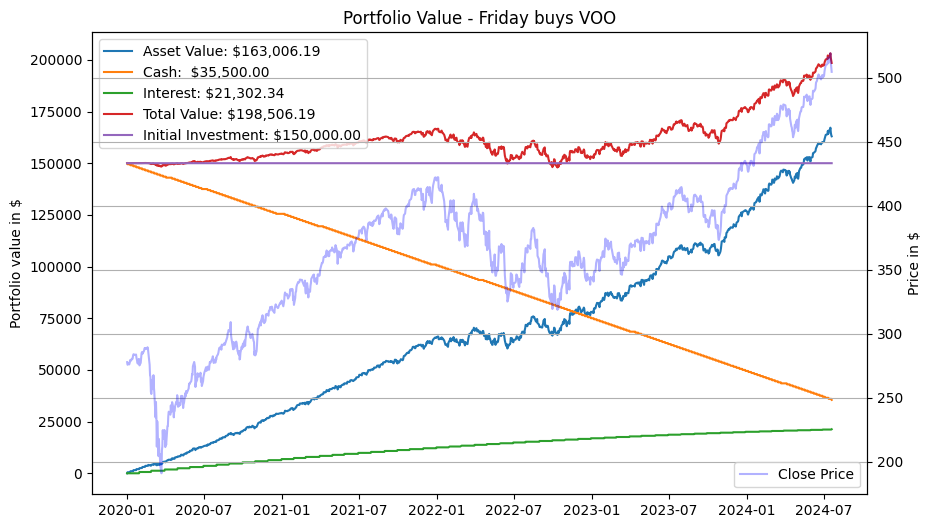

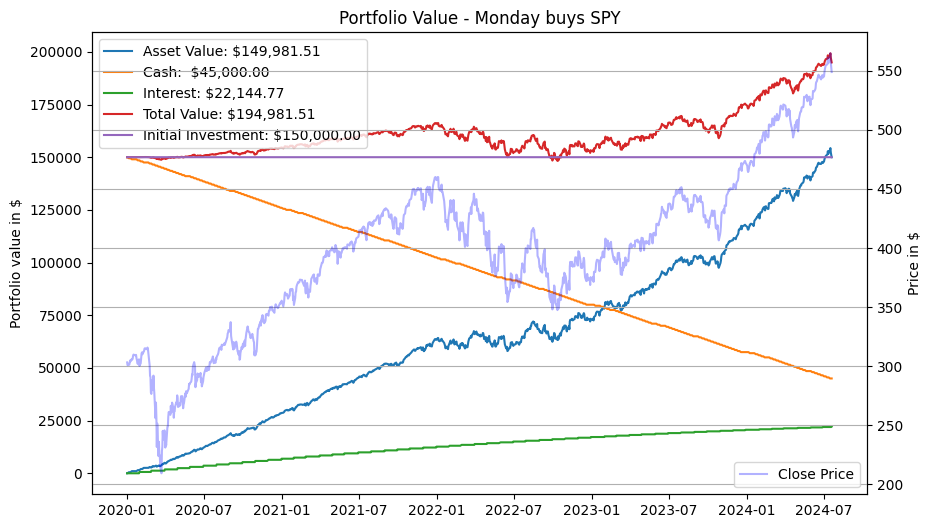

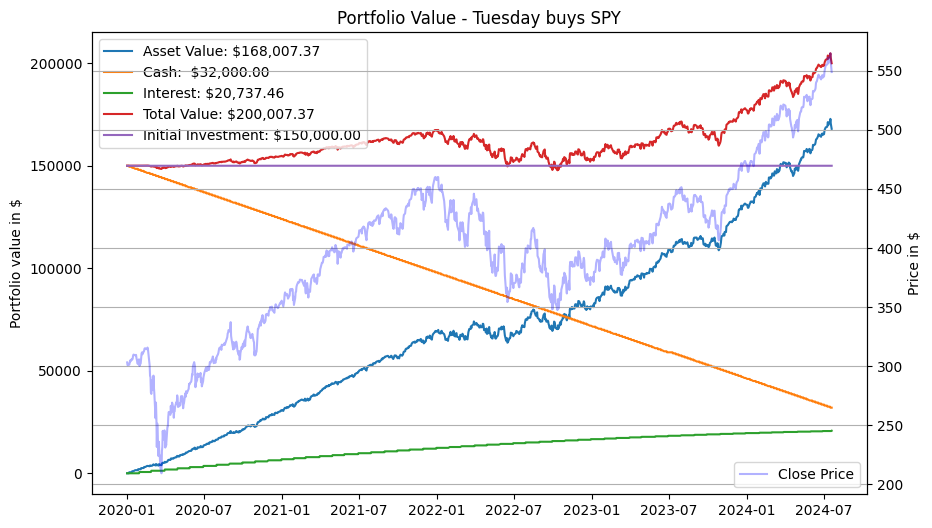

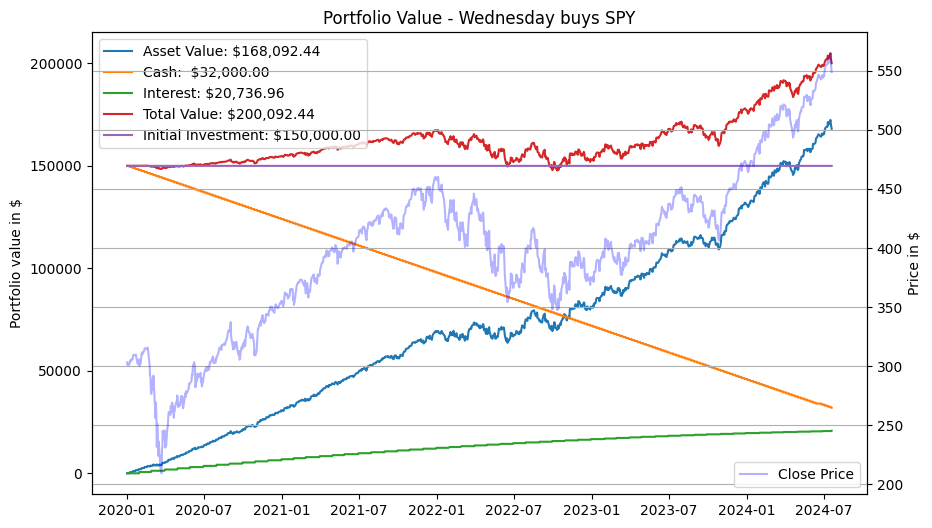

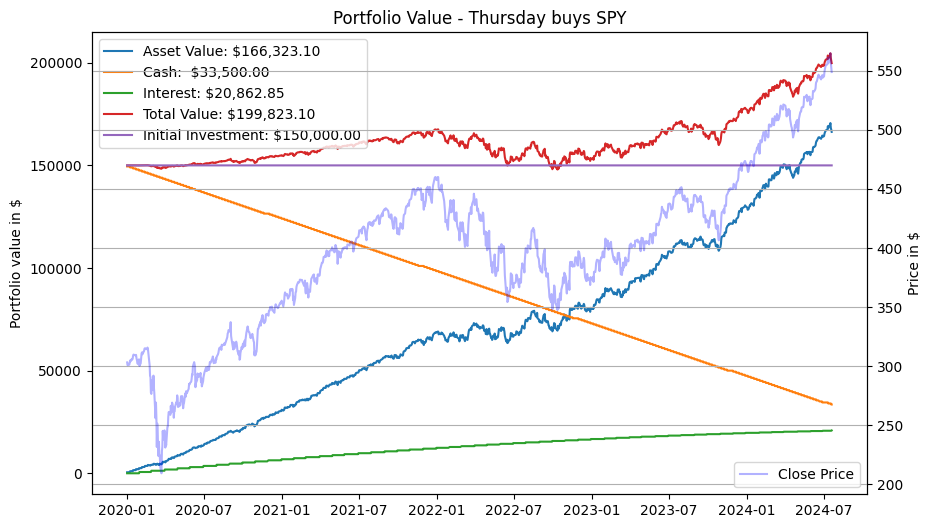

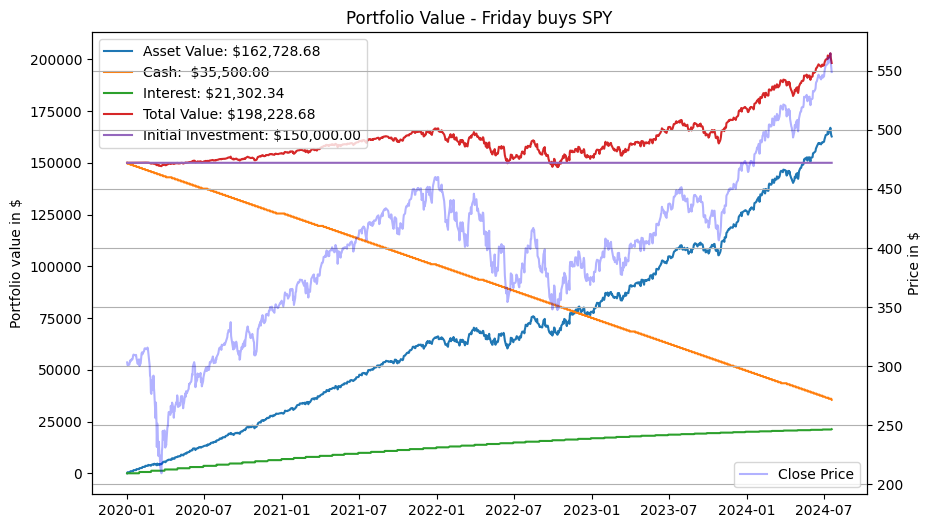

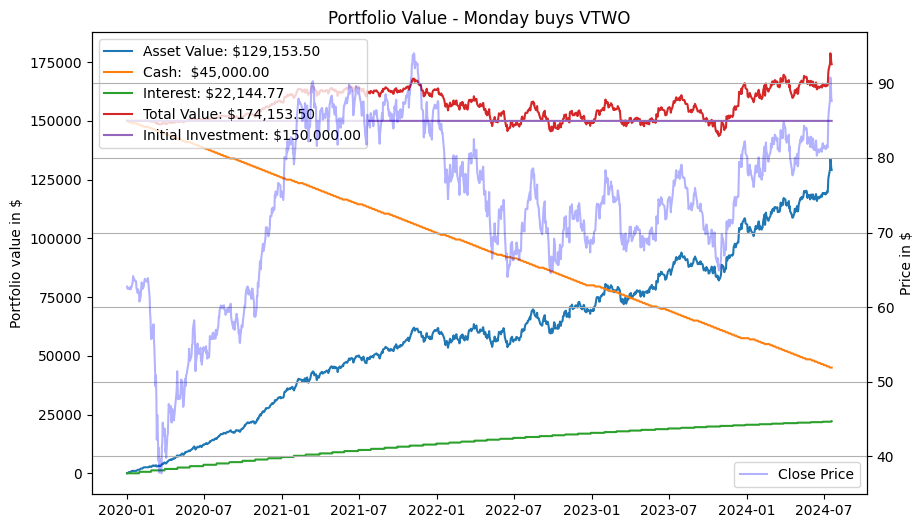

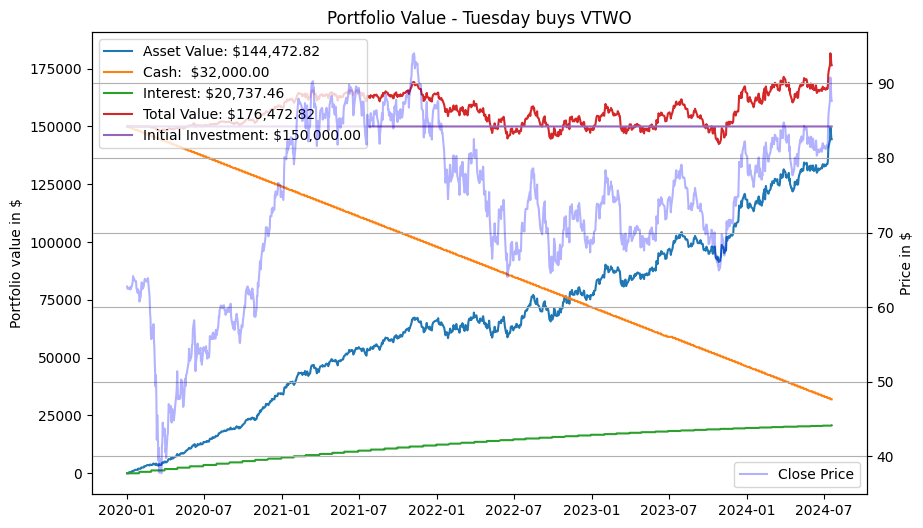

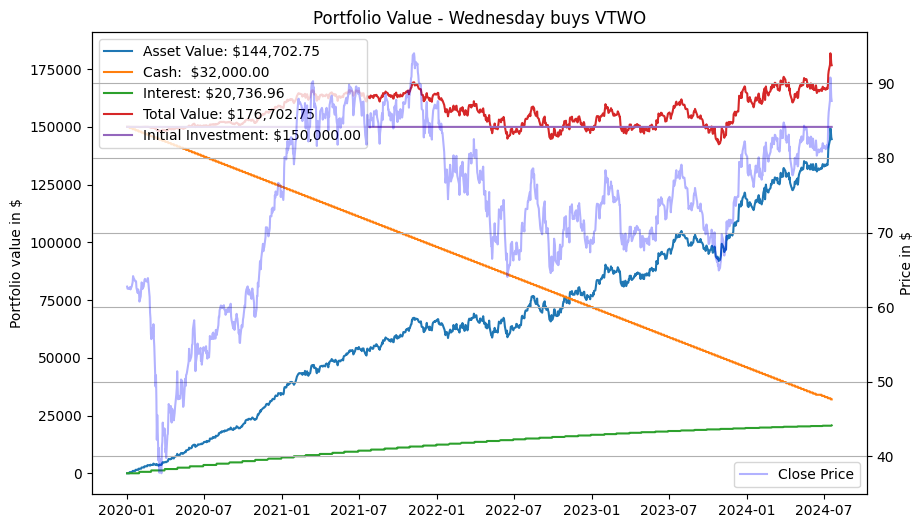

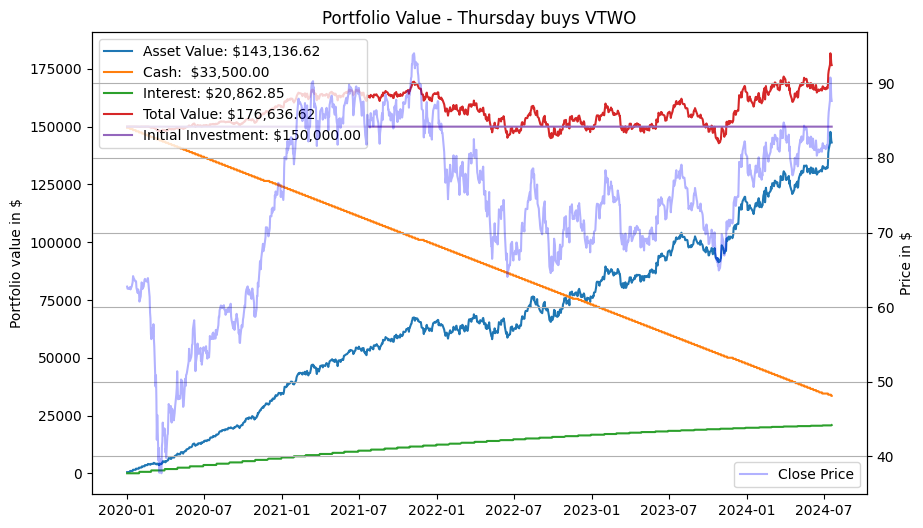

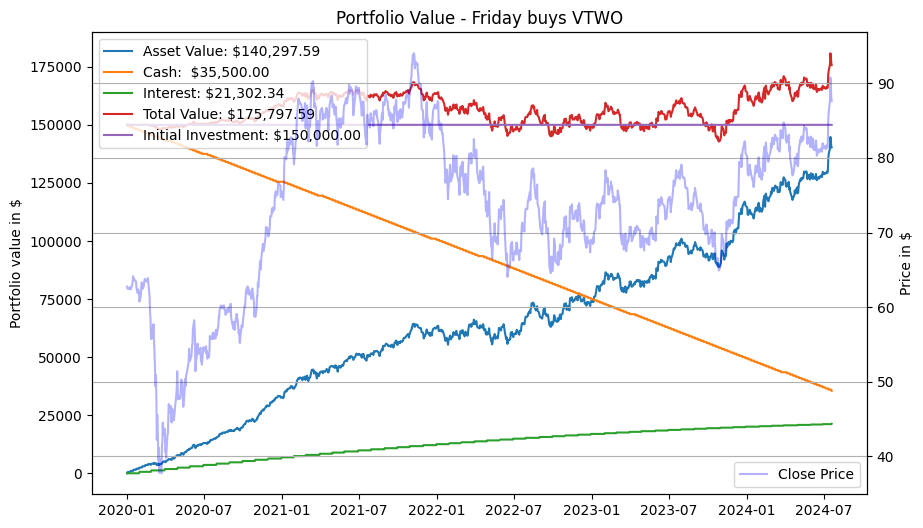

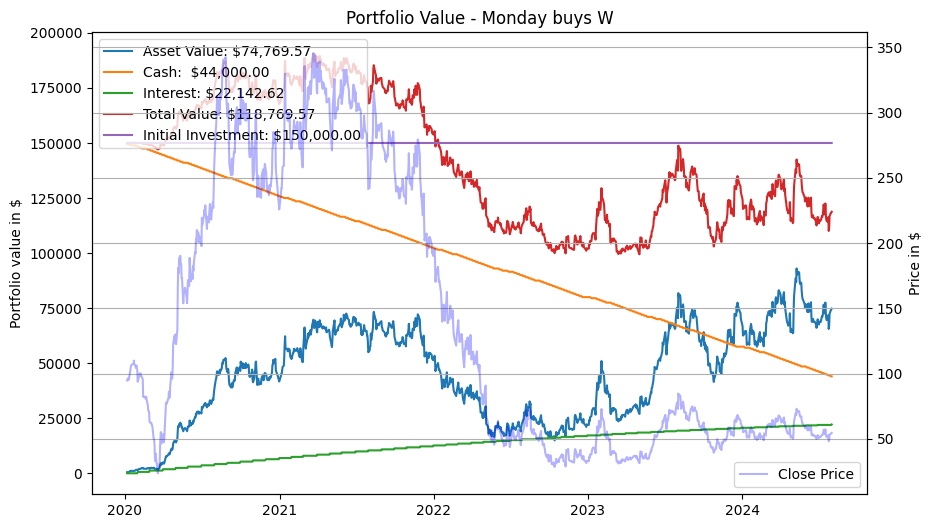

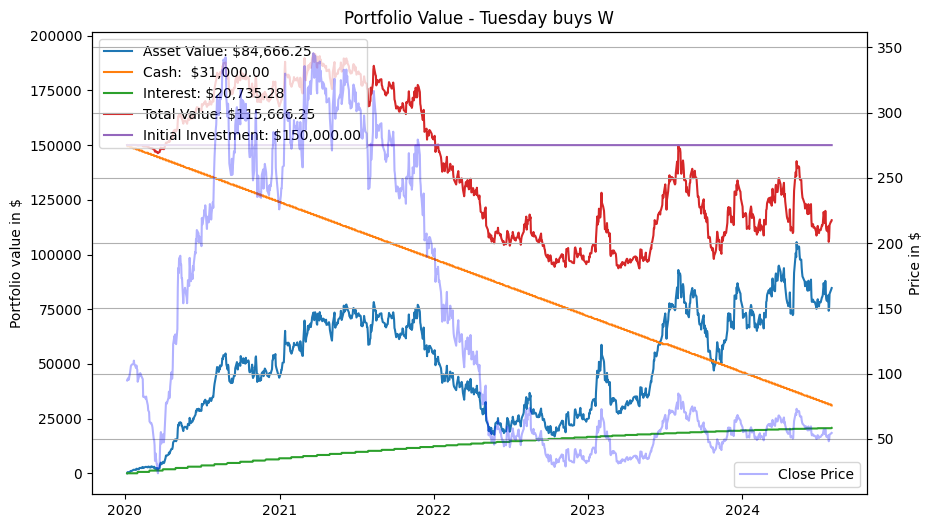

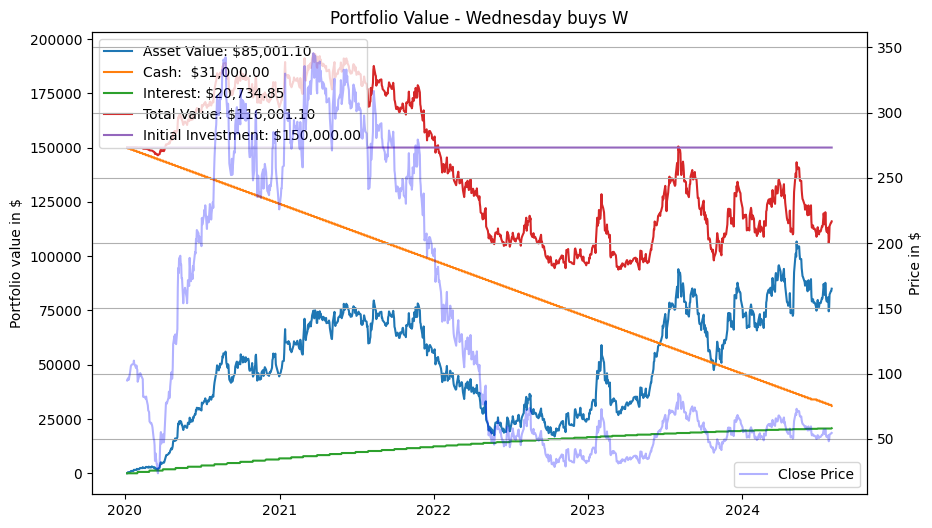

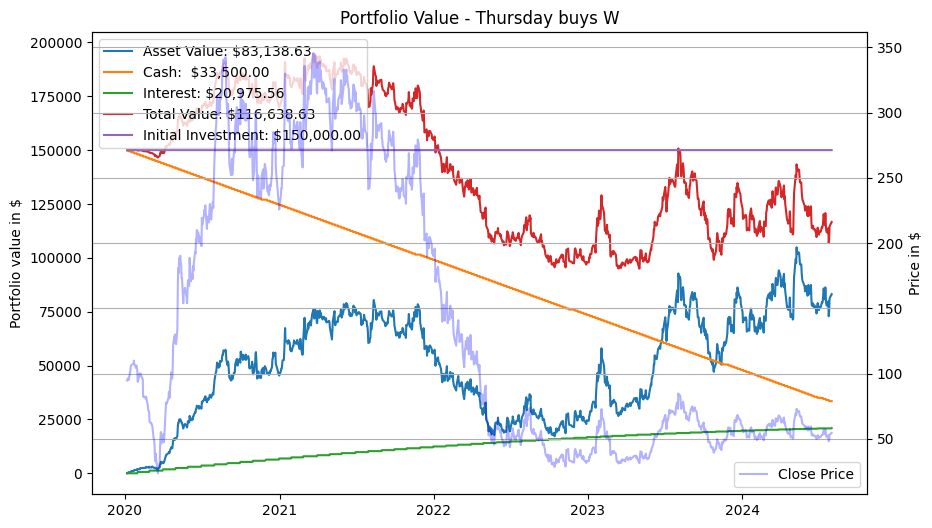

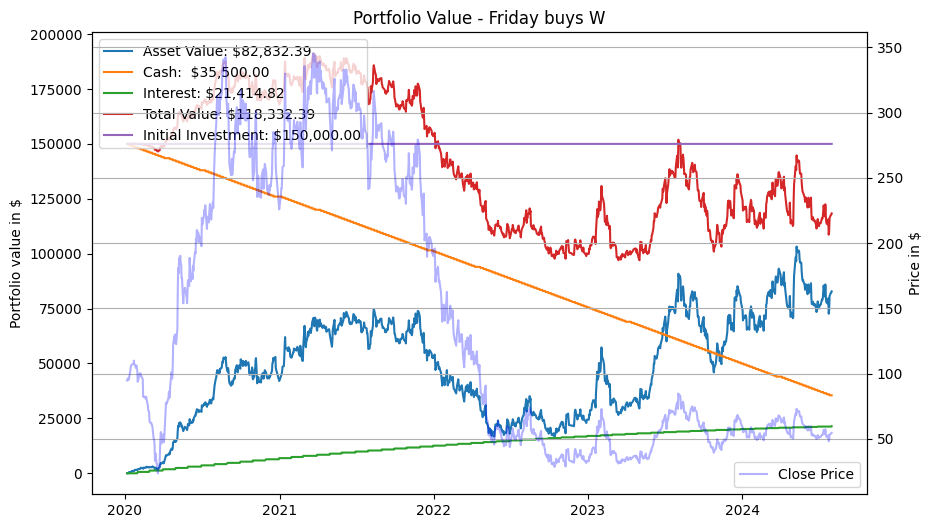

In [123]:
initial_capital = 150000
incremental_investment = 500
tickers = ['VOO', 'SPY', 'VTWO', 'W']
start_date = "2020-01-01"
end_date = "2024-07-21"

week_days = [0, 1, 2, 3, 4]
summary = pd.DataFrame(columns=['Ticker', 'WeekDay', 'Original', 'Assets', 'Cash', 'Interest', 'Total'])
for ticker in tickers:
    for week_day in  week_days:    
        data = dt.download_stock_data(ticker, start_date, end_date)    
        signals = st.buy_on_day_of_week(data, week_day)                
        portfolio = bt.backtest_strategy_by_amount(data, signals, initial_capital, incremental_investment)    
        show_portfolio_performance(portfolio, ticker, week_day, summary)
        
        asset_value = portfolio['asset_value'].iloc[-1]
        cash = portfolio["cash"].iloc[-1]
        interest_total = portfolio["interest_total"].iloc[-1]
        total = portfolio["total"].iloc[-1]            
        original = portfolio["original"].iloc[-1]
        
        # Create a new row as a dictionary
        new_row = pd.DataFrame({
            'Ticker': [ticker],
            'WeekDay': [week_day],
            'Original': [original],
            'Assets': [asset_value],            
            'Cash': [cash],
            'Interest': [interest_total],
            'Total': [total]
        })

        new_row = new_row.dropna(axis=1, how='all')
        
        # Append the new row to the summary DataFrame
        summary = pd.concat([summary, new_row], ignore_index=True)
summary.to_csv(f'summary.csv')



        